**Assignment 1**

---

a) Import data and create time index

In [89]:
import pandas as pd
df= pd.read_csv('tea.csv')
df.head()

,Date,Closing Price
0,10/3/2022,98.8
1,10/4/2022,94.5
2,10/5/2022,98.7
3,10/6/2022,98.5
4,10/7/2022,100.0


In [90]:
df.shape

(480, 2)

In [91]:
### Creating time index
import numpy as np

df['Time_index'] = np.arange(len(df.index))
df

,Date,Closing Price,Time_index
0,10/3/2022,98.80,0
1,10/4/2022,94.50,1
2,10/5/2022,98.70,2
3,10/6/2022,98.50,3
4,10/7/2022,100.00,4
...,...,...,...
475,9/25/2024,124.75,475
476,9/26/2024,122.00,476
477,9/27/2024,126.50,477
478,9/30/2024,126.25,478




---


**b) taking Log returns**


In [92]:

import numpy as np
df['log_Close'] = np.log(df['Closing Price'])
df.head()

,Date,Closing Price,Time_index,log_Close
0,10/3/2022,98.8,0,4.593098
1,10/4/2022,94.5,1,4.548600
2,10/5/2022,98.7,2,4.592085
3,10/6/2022,98.5,3,4.590057
4,10/7/2022,100.0,4,4.605170


In [93]:
# to take log returns

df['log_return'] = df['log_Close'].diff()
df.head()

,Date,Closing Price,Time_index,log_Close,log_return
0,10/3/2022,98.8,0,4.593098,NaN
1,10/4/2022,94.5,1,4.548600,-0.044498
2,10/5/2022,98.7,2,4.592085,0.043485
3,10/6/2022,98.5,3,4.590057,-0.002028
4,10/7/2022,100.0,4,4.605170,0.015114


plot the values of log returns

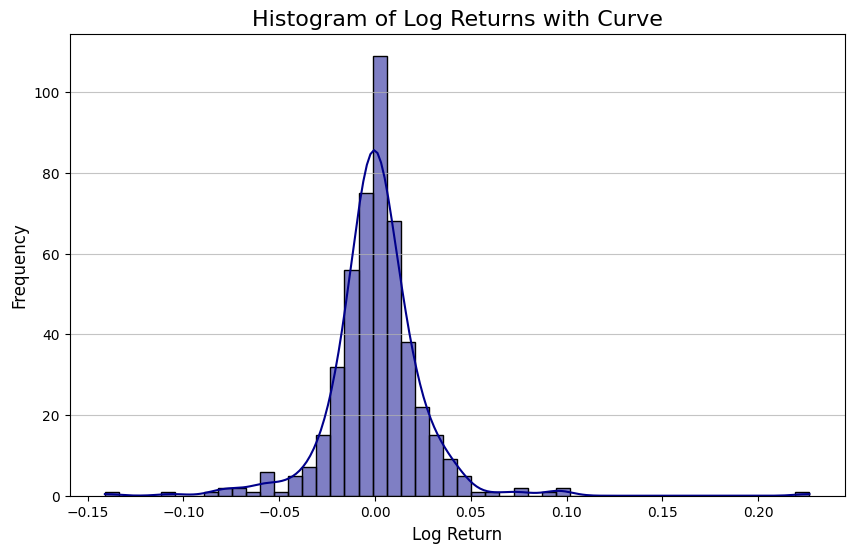

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['log_return'].dropna(), kde=True, bins=50, color='darkblue')
plt.title('Histogram of Log Returns with Curve', fontsize=16)
plt.xlabel('Log Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()



---


**c) Estimating drift parameter and Scale parameter**

In [95]:
# taking means of log returns
m=df['log_return'].mean()
print("drift parameter is ",m)

drift parameter is  0.0005118297774564656


In [96]:
# taking variance of log returns
sigma=df['log_return'].var()
print("Scale parameter is ",sqrt(sigma))

Scale parameter is  0.02510194828589176




---


**d) is this model is appropiate?**

1.1 checking  normality by qq plot

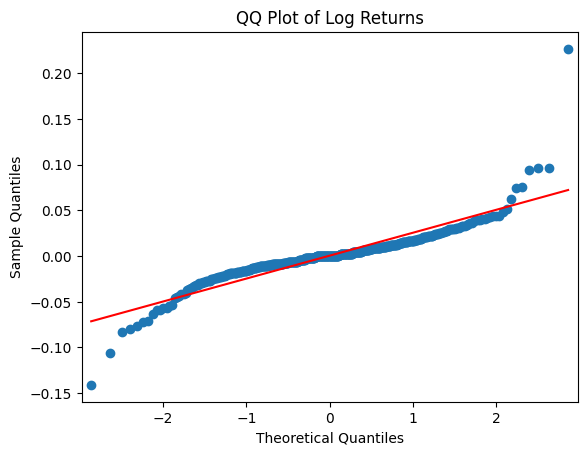

In [97]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df['log_return'].dropna(), line ='s')
plt.title('QQ Plot of Log Returns')
plt.show()

1.2 Tesinng Normality - Shapiro wilk test


In [98]:
# h0: the distribution is normal
#ha: the distribution is not normal
from scipy.stats import shapiro
stat, p = shapiro(df['log_return'].dropna())
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
        print('Reject h0, the distribution is not normal')
else:
        print('Fail to reject h0, the distribution is normal')

Statistics=0.837, p=0.000
Reject h0, the distribution is not normal


2. Testing Independence

In [99]:
# H0: The data is independently distributed (no autocorrelation)
# Ha: The data is not independently distributed (autocorrelation exists)

from statsmodels.stats.diagnostic import acorr_ljungbox

returns = df['log_return'].dropna()

# Perform the Ljung-Box test on the raw log-returns
# lags =10
# boxpierce=False performs only the Ljung-Box test (instead of both Box-Pierce and Ljung-Box)
lb_test = acorr_ljungbox(returns, lags=[10], boxpierce=False)

print("Ljung-Box Test Results for Raw Log-Returns:")
print(lb_test)


alpha = 0.05
p_value = lb_test['lb_pvalue'][10]

if p_value < alpha:
    print(f"\nWith a p-value of {p_value:.3f}, which is less than {alpha}, we reject the null hypothesis.")
    print("Conclusion: The raw log-returns are likely not independent.")
else:
    print(f"\nWith a p-value of {p_value:.3f}, which is greater than or equal to {alpha}, we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to conclude that the raw log-returns are not independent.")

Ljung-Box Test Results for Raw Log-Returns:
      lb_stat  lb_pvalue
10  25.753815   0.004086

With a p-value of 0.004, which is less than 0.05, we reject the null hypothesis.
Conclusion: The raw log-returns are likely not independent.


3. checking constant variance

<Axes: >

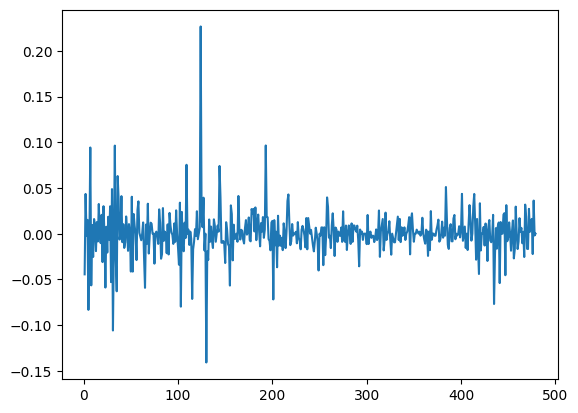

In [100]:
df["log_return"].plot()



---


**e) simulation process**



In [101]:
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [102]:
def BrownianG (m,T,N,sigma,mu,w0,GB=False):
  # if GB= True you can geneate sample paths from geomatric brownian motion

    # Arguments
    # m - Number of sample paths
    # T - total time
    # sigma= scale parameter
    # N - number of steps
    # mu - Drift parameter
    # w0 - starting time

    # Returns : numpy array with shape (m,N+1), where the first column
    # gives the initial values of each points

    # time steps
    dt=T/N# creating a array to store simulated values

    x=np.zeros((m,N+1))
    # initial values of x
    x[:,0]=w0
    x0=x[:,0]
    # creating a array to store simulated values

    if not GB:
      # for an each element of x0, generate a sample of n numbers from a normal distribution
      r=norm.rvs(size=x0.shape+(N,),  loc=mu*dt,scale=sigma*sqrt(dt))
      # this computes brownian motion by taking cumulative sum of random variables
      out=x[:,1:]
      np.cumsum(r , axis =-1, out=out)
      # adding initial value
      out += w0
    else:  # geomatric Brownian motion

      # for an each element of x0, generate a sample of n numbers from a normal distribution
      r=norm.rvs(size=x0.shape+(N,),loc=mu*dt,scale=sigma*sqrt(dt))
      # this computes brownian motion by taking cumulative sum of random variables
      out=x[:,1:]
      np.cumsum(r , axis =-1, out=out)
      if w0!= 0 :
        x[:,1:]=w0*np.exp(out)
      else:
        x[:,1:]=np.exp(x[:,1:])
    return x

    # m no of sample paths and N no of simulated values and
    #first columnis initial values



In [103]:
mu=df["log_return"].mean()
sigma=df["log_return"].std()
w0=df.iloc[-1]["Closing Price"]
w0

np.float64(126.25)

In [104]:
y=BrownianG(10000,20,20,sigma,mu,w0,GB=True)



---


**f) Plot the sample path**

In [105]:
def BrownianPlot(y,T):

  # arguments
  # y - array with shape(m,N+1) , Each row gives discritized version
  # of a sample path. There are m sample paths
  # T- total time

  # Returens
  # Agrapgh of all the sample paths

  # number of steps
  N=y.shape[1]
  # Length of the time step
  dt=T/(N-1)

  t=np.linspace(0.0,N*dt,N)
  for k in range(y.shape[0]):
      plt.plot(t,y[k])
  plt.xlabel('time',fontsize=15)
  plt.ylabel('W_t',fontsize=15)
  plt.grid(True)
  plt.show()

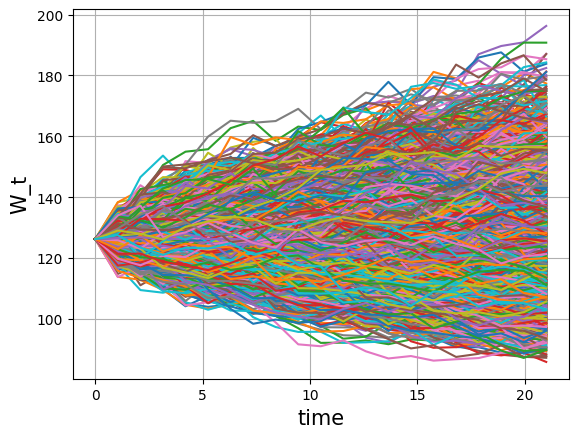

In [106]:
BrownianPlot(y,20)



---


**g)  Draw a box plot for the possible closing price values of TPL corresponding to
 the last day of the next 20-day period**

In [107]:
def BrownianEnd(y,T,loc):

  # arguments
  # y - array with shape(m,N+1) , Each row gives discritized version
  # of a sample path. There are m sample paths
  # T- total time

  # Returens
  # Agrapgh of all the sample paths

  # number of steps
  N=y.shape[1]
  # Length of the time step
  dt=T/(N-1)
  # the positio of the array corresponding to the given location
  pos=int(loc/dt)
  # boxplot
  plt.boxplot(y[:,pos])
  plt.show()

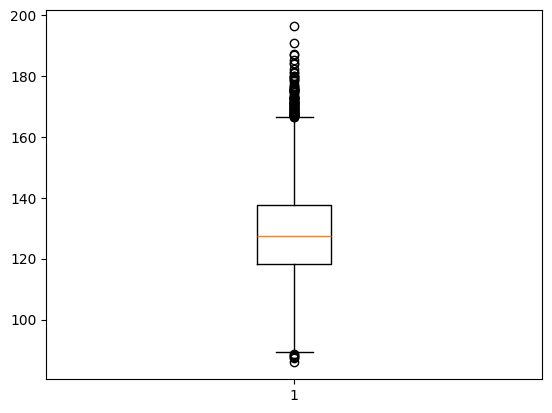

In [108]:
BrownianEnd(y,20,20)



---


**h) What is the probability that the closing price corresponding to the last day of
 the next 20-day period is between 130 and 140?**

In [109]:

dfGBM=pd.DataFrame(y.T)
dfGBM
#one column = one sample path

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,...,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000,126.250000
1,127.354401,123.614302,121.937221,124.656971,128.886521,128.540356,122.563512,129.613872,128.734728,125.354505,...,126.640870,122.937096,133.752595,127.285206,126.584466,131.523421,134.024672,129.725585,129.054136,127.522291
2,128.069295,123.636695,118.393810,131.140286,124.192124,125.868329,120.590450,134.026154,125.909253,125.329581,...,127.334388,127.476671,132.463282,132.920091,126.817678,129.360988,137.209627,134.294953,127.984353,123.452298
3,127.128272,123.972052,123.185977,133.342284,123.801794,125.542072,116.308622,135.308648,128.334475,129.875030,...,128.816451,122.156479,130.028556,132.724679,126.327889,129.209719,126.930811,137.079810,126.101318,121.065239
4,129.413374,125.582126,125.242702,132.090409,119.101223,131.302542,116.287605,136.832952,126.284651,131.876529,...,130.665400,124.729538,133.336250,132.403990,128.045923,129.654212,128.442074,131.872364,130.310396,123.440381
5,132.155518,125.679865,125.525057,132.649035,125.815812,133.094772,111.060873,135.378014,127.429449,132.800752,...,134.453528,123.848710,137.513361,125.981552,126.186108,131.098192,131.575752,127.775780,132.042108,123.141711
6,135.562700,124.394441,124.872934,130.346761,125.860815,138.310595,108.195490,134.528390,127.073315,128.856026,...,138.660348,123.518740,136.012590,128.573054,126.394530,125.203438,128.135738,127.784777,133.634406,124.927961
7,137.235563,127.327012,132.575473,127.541744,123.240637,143.588390,111.292668,139.784063,128.090495,128.815467,...,141.585462,119.570506,129.437038,129.504026,125.645297,126.150196,125.000886,131.661001,132.944872,121.165856
8,137.465459,128.360386,132.510505,129.483937,123.750531,140.880224,108.177462,140.606675,123.155497,128.307268,...,139.127631,112.651541,124.682286,131.269138,122.748204,132.073803,123.461682,132.110457,130.074557,122.725287
9,137.536309,127.822130,130.220996,135.389647,121.859444,139.104054,105.213507,141.582200,126.912427,128.793385,...,138.395593,113.184014,125.468732,135.029861,127.934133,134.274483,129.503757,133.172203,129.161616,117.826376


In [110]:
EndingValuesGBM= dfGBM.loc[20]
EndingValuesGBM.describe()

,20
count,10000.000000
mean,128.337826
std,14.456490
min,85.886268
25%,118.315109
50%,127.397304
75%,137.614238
max,196.282564


In [111]:
len(EndingValuesGBM[(EndingValuesGBM>130)&(EndingValuesGBM<140)])/len(EndingValuesGBM)

0.2241



---


**i) Find the 95% prediction interval for the closing price value corresponding to the
 last day of the next 20-day period**

In [112]:
# 95% percentile interval for Ending values
np.percentile(EndingValuesGBM,[2.5,97.5])

array([102.8199668 , 159.12509685])